In [93]:
import pandas as pd
columns = ['patientFamilyID',
           'paitientFamilyMemberID',
           'providerID',
           'providerType',
           'stateCode',
           'dateOfService',
           'medicalProcedureCode',
           'dollarAmountClaim']
df = pd.read_csv('claims_final.csv', names = columns)

gb = df.groupby('providerType')





In [94]:
df_list = df['providerType'].unique()

df_list = [df[df['providerType']==i] for i in df_list]
print(df_list[0].shape[0])

3240558


In [95]:
#Set up feature vectors

def generate_feature_1(df):
    # Money spent for this person at this visit
    
    return df['dollarAmountClaim']

#generate_feature_1(df_list[0])

In [96]:
def generate_feature_2(df):
    # Average money spend for all previous visit in this provider from this patient
    #df['provider_medical_concat'] = df['providerType'].astype(str).str.cat(df['medicalProcedureCode'].astype(str))
    #df['patient']= df['patientFamilyID'].astype(str) + "|" + df['paitientFamilyMemberID'].astype(str) + "|" + df['providerID'].astype(str) 
    #df_avg_dollar = df.groupby(['patientFamilyID','paitientFamilyMemberID','providerID']).agg({'dollarAmountClaim':'mean'})
    df = df[~df['dollarAmountClaim'].isnull()]
    df['patient'] = df['patientFamilyID'].astype(str) + "|" + df['paitientFamilyMemberID'].astype(str) + "|" + df['providerID'].astype(str) 
    temp = df.groupby(['patient']).agg({'dollarAmountClaim':'mean'}).reset_index()
    df = pd.merge(df, temp, on='patient')
    
    #df['average spent']=df_avg_dollar[]
    #df_avg_dollar = df.groupby('patient').agg({'dollarAmountClaim':'mean'})
    #
    return df.dollarAmountClaim_y
    

#generate_feature_2(df_list[0])

In [ ]:
def generate_feature_3(df):
    # 

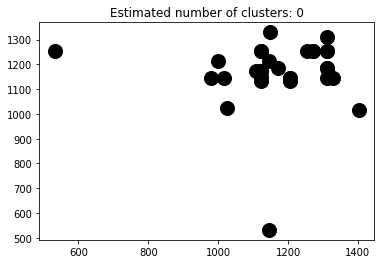

In [98]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
#for df in df_list:
    # iterate over each service provider type
 #   series_f1 = generate_feature_1(df)
  #  series_f2 = generate_feature_2(df)

df = df_list[-1]
series_f1 = generate_feature_1(df).values
series_f2 = generate_feature_2(df).values
X = np.zeros((len(series_f1), 2))
X[:,0] = series_f1
X[:,1] = series_f2

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
    


    

X

In [66]:
series_f1

array([ 707.08,  381.37, 1681.68, ...,  666.64,  475.65,  594.56])

In [67]:
series_f2

array([ 828.484,  828.484,  828.484, ..., 1044.42 ,  967.065,  967.065])

array([[1151.15, 1151.15],
       [ 797.69,  860.87],
       [ 804.  ,  860.87],
       ...,
       [1044.42, 1230.86],
       [1485.83, 1385.29],
       [1456.83, 1151.15]])